# Devanagari Handwritten Character Recognition using CNN

Steps of model building:

1. Imported the necessary libraries for model building.
2. Defined the architecture of the model- There are 4 convolutional layers, 2 maxpooling layers, 1 dense layer, and output layer. 
Relu activation function is used for all layers except for output layer. Softmax activation function is used for output layer 
as it is multiclass classification.
3. In order to compile the model adam optimizer is used as it is efficient when working with large data and requires less memory. 
Loss is calculated by using categorical crossentropy as there are more than two classes and accuracy metric is used to check 
the performance of model.
4. The data of about 92,000 is imported. There are 46 classes and each class has 1700 images in it.
Preprocessing of data is performed using ImageDataGenerator module. It tilt, rotate, rescale the image and transform the images. Here, images are transformed to 32*32 size and batch size is 256, so 256 images will go through network before the weights are updated.
5. Model is fitted to the training and testing data. Epoch size is 10 and batch size is 80. Intially epoch size used was 5, 7. But those were giving wrong predictions for single image. So, to improve accuracy tried with 20 epochs but the anaconda was not responding. Therefore, submitting the file for 10 epochs.
6. Then model is summarized, evaluated and saved. There is no overfitting of model as training and testing accuracy is almost close to each other.
7. At last the graphical user inteface is created by using tkinter library which will give prediction for single image.

Data Link- https://www.kaggle.com/ashokpant/devanagari-character-dataset-large

Things which are unique-
1. Most of the people have performed digit recognition system and who has performed the character as well digit have used very complex model. I have tried to make it simple.
2. Tried by changing hyperparameters.
3. People have created GUI by using Flask, pickle. Here, it is created by using tkinter library.
4. Also tried with creating own data and predicting for it. But, there are errors in reading the image so, trying to improve the model for predicting correctly for any image.

# Import the libraries

In [ ]:
#Keras Imports - CNN
#Deals with ordering of layers within a model
from keras.models import Sequential
#Define the architecture of model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#To load the trained model
from keras.models import load_model
#To transform the original data
from keras.preprocessing.image import ImageDataGenerator
#To import image and preprocess
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
#To perform image processing
from PIL import ImageFile
# Visualisation imports
import numpy as np
import matplotlib.pyplot as plt


# Architecture of CNN model 

In [2]:
#To initialize the model
classifier = Sequential()
#Addition of first convolution layer-detect the image boundaries.
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
#Addition of second convolution layer
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
#Addition of first maxpooling layer-To reduce the size of array and compress it.
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#Addition of third convolution layer
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
#Addition of fourth convolution layer
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
#Addition of second maxpooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#To drop random images from data and fit the modelto avoid overfitting
classifier.add(Dropout(.2))
#To flatten the input shape
classifier.add(Flatten())
#To add fully connected layer- units is the shape of output layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.2))
#Output layer of model- units are 46 because there are 46 classes
classifier.add(Dense(units = 46, activation = 'softmax'))
#To compile the defined model
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Preprocessing of images 

In [3]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
#To avoid overfitting
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1/255)
#To read the data
training_set = train_datagen.flow_from_directory("C:\\Users\\Snehal Sankanna\\Downloads\\DevanagariHandwrittenCharacterDataset\\DevanagariHandwrittenCharacterDataset\\Train", target_size = (32, 32), 
                                                 batch_size = 256, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory("C:\\Users\\Snehal Sankanna\\Downloads\\DevanagariHandwrittenCharacterDataset\\DevanagariHandwrittenCharacterDataset\\Test", target_size = (32, 32), 
                                                 batch_size = 256, class_mode = 'categorical')

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


# Fitting of Model

In [4]:
#Fitting the cnn model to the dataset
history = classifier.fit(training_set, epochs = 10, batch_size=80,
                        validation_data = test_set)

Epoch 1/10
306/306 [==============================] - 1127s 4s/step - loss: 1.3138 - accuracy: 0.6354 - val_loss: 0.2352 - val_accuracy: 0.9287
Epoch 2/10
306/306 [==============================] - 891s 3s/step - loss: 0.4057 - accuracy: 0.8765 - val_loss: 0.1324 - val_accuracy: 0.9614
Epoch 3/10
306/306 [==============================] - 702s 2s/step - loss: 0.2691 - accuracy: 0.9175 - val_loss: 0.0901 - val_accuracy: 0.9736
Epoch 4/10
306/306 [==============================] - 725s 2s/step - loss: 0.2073 - accuracy: 0.9361 - val_loss: 0.0774 - val_accuracy: 0.9775
Epoch 5/10
306/306 [==============================] - 729s 2s/step - loss: 0.1725 - accuracy: 0.9463 - val_loss: 0.0618 - val_accuracy: 0.9830
Epoch 6/10
306/306 [==============================] - 748s 2s/step - loss: 0.1523 - accuracy: 0.9527 - val_loss: 0.0577 - val_accuracy: 0.9836
Epoch 7/10
306/306 [==============================] - 906s 3s/step - loss: 0.1334 - accuracy: 0.9580 - val_loss: 0.0541 - val_accuracy: 0.984

# Print the summary of the model

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

# Evaluating the model

In [6]:
#Evaluation for training set
scores = classifier.evaluate(training_set)
print("Accuracy: %.2f%%" % (scores[1]*100))

306/306 [==============================] - 514s 2s/step - loss: 0.0388 - accuracy: 0.9879
Accuracy: 98.79%


In [7]:
#Evaluation for testing set
scores = classifier.evaluate(test_set)
print("Accuracy: %.2f%%" % (scores[1]*100))

54/54 [==============================] - 192s 4s/step - loss: 0.0474 - accuracy: 0.9868
Accuracy: 98.68%


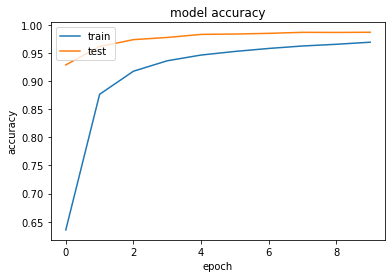

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


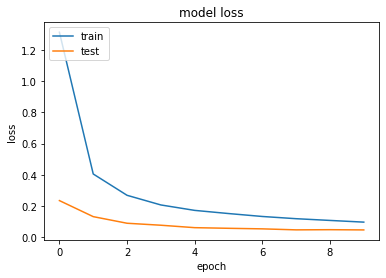

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the model

In [11]:
classifier_json = classifier.to_json()

with open("CNN_DevanagariHandWrittenCharacterRecognition.json", "w") as json_file:
    json_file.write(classifier_json)
    
classifier.save_weights("DHCR")
print('Saved model to disk')

Saved model to disk


In [12]:
#To check the labels of the images in the training dataset
training_set.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 